In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('Student Feedback Surveys-Superview.csv')
df

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right
...,...,...,...,...,...,...
1448,1495,New York City,"Apps, Explorer",Week 7,10,Just right
1449,1496,New York City,"Apps, Explorer",Week 7,8,Just right
1450,1497,New York City,Apps,Week 7,10,Just right
1451,1498,New York City,"Apps, Explorer",Week 7,1,A little too slow


In [3]:
remove_error = df[df['Rating (Num)'] == '#ERROR!'].index
df.drop(remove_error , inplace=True)

df['Rating (Num)'].dropna().value_counts()

8     392
9     384
10    376
7     177
6      59
5      35
4      13
3       8
1       2
2       2
0       2
Name: Rating (Num), dtype: int64

<p>Convert the "Rating" to an integer.</p>

In [23]:
df['Rating (Num)'] = df['Rating (Num)'].apply(lambda x: int(x))

In [4]:
promoters = len(df[(df['Rating (Num)'] == '10') | (df['Rating (Num)'] == '9')])
print('Ratings that received a 9 or 10 are called "Promotors": ' + str(promoters))

Ratings that received a 9 or 10 are called "Promotors": 760


In [5]:
passives = len(df[(df['Rating (Num)'] == '8') | (df['Rating (Num)'] == '7')])
print('Ratings that received a 7 or 8 are called "Passives": ' + str(passives))

Ratings that received a 7 or 8 are called "Passives": 569


In [8]:
detractors = len(df[pd.to_numeric(df['Rating (Num)']) < 7])
print('Ratings that received a 6 or less are called "Detractors": ' + str(detractors))

Ratings that received a 6 or less are called "Detractors": 121


<h1>The Total Numbers:</h1>
<ul>
    <li>Promoters: 760</li>
    <li>Passives: 569</li>
    <li>Detractors: 121</li>
</ul>

In [10]:
NPS = (promoters - detractors)/(promoters + passives + detractors) * 100
print('The Net Promotor Score (NPS) is: ' + str(NPS))

The Net Promotor Score (NPS) is: 44.06896551724138


<p>Given this, we can determine that the overall NPS score was actually quite good!</p>

<h1>What Percentage of the Students were in each track?</h1>

In [13]:
print("Attendance of each track (% of total):")
round((df['Track'].value_counts()/df['Track'].value_counts().sum()) * 100, 3)

Attendance of each track (% of total):


Apps               61.949
Apps, Explorer     15.932
Games              14.794
VR                  4.267
Games, Explorer     3.058
Name: Track, dtype: float64

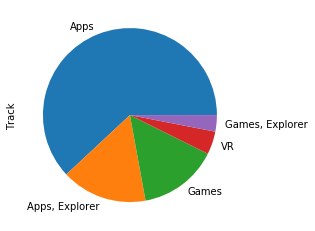

In [14]:
df['Track'].value_counts().plot.pie()
plt.show()

<h1>How many more promoters were there than detractors?</h1>

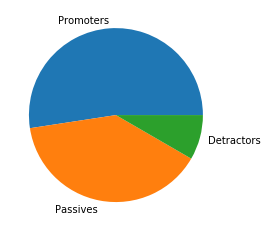

In [17]:
plt.pie([promoters, passives, detractors], labels=['Promoters', 'Passives', 'Detractors'])
plt.show()

In [19]:
print(promoters-detractors)

639


<p>So there are 639 more promoters than detractors.</p>

<h1>Does the student experience get better the longer that they are enrolled at the Summer Academy?</h1>

,Rating (Num)
Week,
Week 1,8.267361
Week 2,8.347826
Week 3,8.522822
Week 4,8.331606
Week 5,8.441341
Week 6,8.541667
Week 7,8.600000
Week 8,9.111111


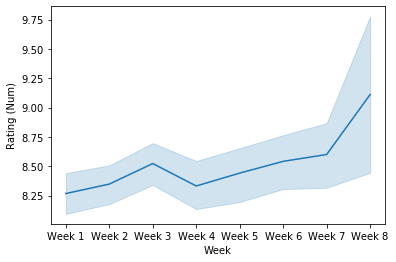

In [24]:
sns.lineplot(x="Week", y="Rating (Num)", data=df)
pd.DataFrame(df.groupby(['Week'])['Rating (Num)'].mean())

<p>By the graph above, we can say that the experience does get better as students are enrolled longer at the summer academy.</p>

<h1>What was the most populated track?</h1>

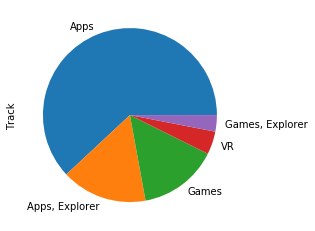

In [25]:
df['Track'].value_counts().plot.pie()
plt.show()

<p>If we re-examine the pie chart showing the distribution of the atendees, we can see that the most populated track is the "Apps" track.</p>